# 1. Questions

These are the questions we are going to focus in the analysis of Titanic Dataset. From my point of view, the most interesting questions are related to whether the passenger had survived or not. But I have added other questions as well.

* The fact of being alone aboard, makes easy to survive?
* Old people (> 65yo) or children (< 15yo) were more likely to survive?
* What were all the difference between classes?
* How many children lost their parents?
* Is the embarked port related to the age? or to the class?
* Was the sex and important factor?

# 2. Wrangling Data

In [575]:
import pandas as pd # Importing libraries
import numpy as np

In [576]:
titanic_df = pd.read_csv('/Users/dgcagigas/Documents/DataAnalyzer/P2/titanic-data.csv') # Read csv

First of all, we will delete the crew (fare = 0) from the Dataset as I only want to analyze the passengers (fare = 0). 
We will delete columns Cabin, Name and Ticket as we will not use it.

After this we still have some missing values from Age and Embarked people. 169 ages are missing and 2 embarked people, we could calculate these values through medias however due to the low quantity I will delete these passengers in the questions we will analyze age or embarked people.

Using panda function, describe() and info(), we can see a summary of missing values and all data.

In [577]:
titanic_df = titanic_df[titanic_df.Fare != 0]
titanic_df = titanic_df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)

In [578]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 890
Data columns (total 8 columns):
Survived    876 non-null int64
Pclass      876 non-null int64
Sex         876 non-null object
Age         707 non-null float64
SibSp       876 non-null int64
Parch       876 non-null int64
Fare        876 non-null float64
Embarked    874 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 61.6+ KB


In [579]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,876.000000,876.000000,707.000000,876.000000,876.000000,876.000000
mean,0.389269,2.315068,29.645219,0.531963,0.388128,32.755650
std,0.487863,0.835663,14.558872,1.110009,0.811374,49.936826
min,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.925000
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.500000
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 3. Exploration Data and Draw Conclusions

We will start the exploratory data analysis, with a scatter matrix plot as it will be useful to get a first feeling about the whole dataset.

In [580]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x146b75750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x148be5490>]], dtype=object)

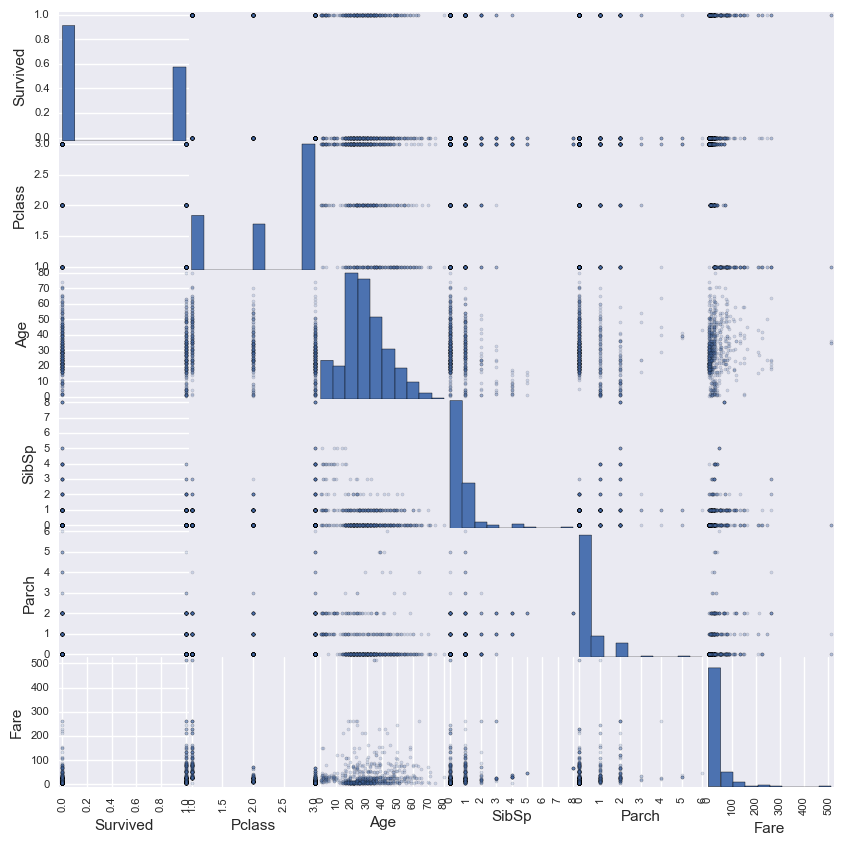

In [581]:
scatter_matrix(titanic_df,alpha = 0.2, figsize = (10,10))

Here you can see a summary of all values. We see on the bars graphs the number of people Survived or died, belong to 1st, 2nd or 3rd Class, depending on the age and so on. We can see clearly a skewed distribution in all the bars graphs.

## 3.1. The fact of being alone aboard, makes easy to survive?

It might be interested to study the relation between being alone aboard or with family, as solo people find a place in a boat easily than people with family.

In [582]:
def survdied(survived):
    if survived == 0:
        return 'Died'
    else:
        return 'Survived'

In [583]:
titanic_df['isAlone']= pd.Series((titanic_df.SibSp == 0) & (titanic_df.Parch == 0)) ## Adding column
titanic_df['survdied'] = pd.Series(titanic_df.Survived.apply(survdied)) ## Adding column

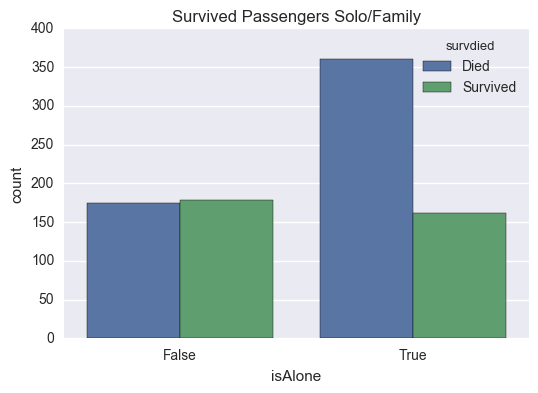

In [584]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def TableSeries(p1, p2, row1, row2):
    return pd.Series([p1, p2],
                        index=[row1, row2])

soloP = titanic_df[titanic_df.isAlone == True]
familyP = titanic_df[titanic_df.isAlone == False]
soloPS = soloP[soloP.Survived == True]
familyPS = familyP[familyP.Survived == True]

soloTable = {
    'Passengers': TableSeries(len(soloP), len(familyP), 'Solo', 'Family'),
    'Survived': TableSeries(len(soloPS),len(familyPS), 'Solo', 'Family'),
    '% Passeng.': TableSeries((100*float(len(soloP)) / (len(soloP) + len(familyP))) , (100*float(len(familyP)) / (len(soloP) + len(familyP))), 'Solo', 'Family'),
    '% Surv.': TableSeries((100*float(len(soloPS)) / (len(soloP))) , (100*float(len(familyPS)) / (len(familyP))), 'Solo', 'Family'),
}

sns.countplot(data = titanic_df, x = 'isAlone', hue = 'survdied')
sns.plt.title('Survived Passengers Solo/Family')
#sns.plt.legend('Died')

sns.plt.show()

This shows a comparision between survival of solo people and people with family aboard. It seems clear that having a  family abroad was more likely to survive. You can see below a table with more information.

In [585]:
pd.DataFrame(soloTable)

,% Passeng.,% Surv.,Passengers,Survived
Solo,59.589041,31.034483,522,162
Family,40.410959,50.564972,354,179


We can see above that the probability to survive being alone was lower than with family.

## 3.2. Old people (> 65yo) or children (< 15yo) were likely to survive?

Another interesting data is the age. It is logic for me to save first children and old people, as they can not survive for themselves.

We have to delete passenger with age missing.

In [586]:
titanicAge_df = titanic_df.drop(['Embarked'], axis=1).dropna() ## Delete Embarked Column and ages missed

In [587]:
titanicAge_df['isOld'] = pd.Series(titanicAge_df.Age > 65) ## Adding column for old and young people
titanicAge_df['isYoung'] = pd.Series(titanicAge_df.Age < 15)

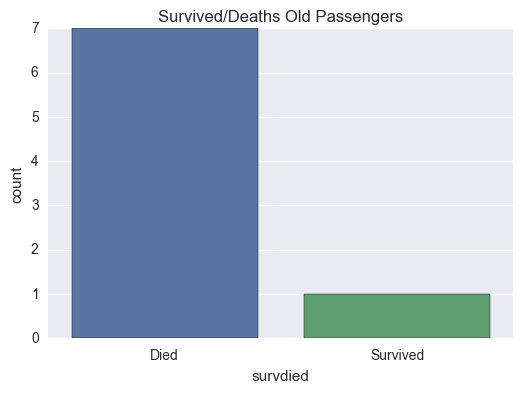

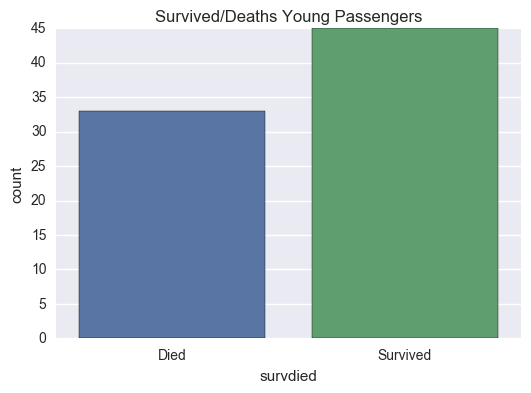

In [588]:
oldP = titanicAge_df[titanicAge_df.isOld == True]
youngP = titanicAge_df[titanicAge_df.isYoung == True]
oldPS = oldP[oldP.Survived == True]
youngPS = youngP[youngP.Survived == True]

ageTable = {
    'Passengers': TableSeries(len(oldP), len(youngP), 'Old', 'Young'),
    'Survived': TableSeries(len(oldPS),len(youngPS), 'Old', 'Young'),
    '% Passeng.': TableSeries((100*float(len(oldP)) / (len(titanicAge_df))) , (100*float(len(youngP)) / (len(titanicAge_df))), 'Old', 'Young'),
    '% Surv.': TableSeries((100*float(len(oldPS)) / (len(oldP))) , (100*float(len(youngPS)) / (len(youngP))), 'Old', 'Young'),
}

sns.countplot(data = oldP, x = 'survdied')
sns.plt.title('Survived/Deaths Old Passengers')
sns.plt.show()
sns.countplot(data = youngP, x = 'survdied')
sns.plt.title('Survived/Deaths Young Passengers')
sns.plt.show()


As you can see in the graphs, old people were likely to die. I will show now a graph with the survived people depending on the age.

In [589]:
pd.DataFrame(ageTable)

,% Passeng.,% Surv.,Passengers,Survived
Old,1.131542,12.500000,8,1
Young,11.032532,57.692308,78,45


You can see clearly that old people were likely to die, while young people

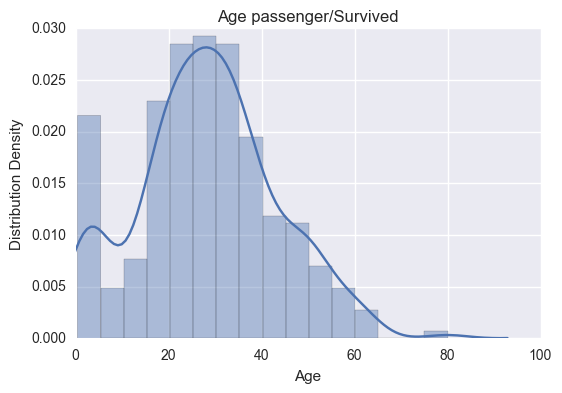

In [590]:
ax = sns.distplot(titanicAge_df[titanicAge_df.Survived == 1].Age)
ax.set(xlabel='Age', ylabel='Distribution Density')
sns.plt.title('Age passenger/Survived')
sns.plt.xlim([0,100])
sns.plt.show()

Here we can see the people survived depending on their age. It is clear that people between 20 and 35 were more likely to survive than the others.

## 3.3. What were all the difference between classes?

Another point in the investigation is the class. It might be thought that in a extreme situation as the happened in the titanic, to belong to the first class or third class is not important tu surivive.

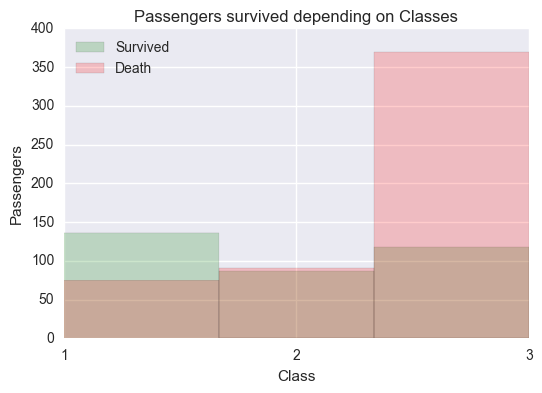

In [591]:
plt.hist(titanic_df[titanic_df.Survived == True].Pclass, 3, facecolor = 'green', alpha = 0.2, label = 'Survived')
plt.hist(titanic_df[titanic_df.Survived == False].Pclass, 3, facecolor = 'red', alpha = 0.2, label = 'Death')
plt.legend()
plt.xticks([1,2,3],['1','2','3'])
plt.xlabel('Class')
plt.ylabel('Passengers')
plt.legend(loc = 'upper left')
plt.title('Passengers survived depending on Classes')
plt.show()

We can see a big difference between people death from 1st or 2nd Class and people death from 3rd Class.

## 3.4. How many parents lost their children in the Titanic (they might have died too)?

It would be more interested if we know wether their parents keep alive or not, but children deaths is interesting.

In [592]:
Children = titanicAge_df[titanicAge_df.isYoung]
ChildrenD = Children[Children.Survived == 0] # Children deaths with parents aboard
print '%d Children died from a total of %d' % (len(ChildrenD), len(Children))


33 Children died from a total of 78


## 3.5. Is the embarked port related to the age? or to the class?

Is people from a city more likely to belong to a specific class or be an age?

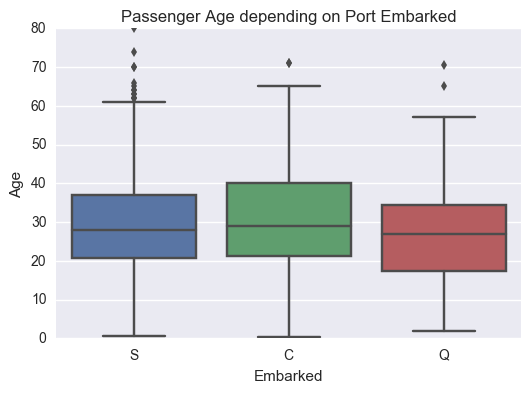

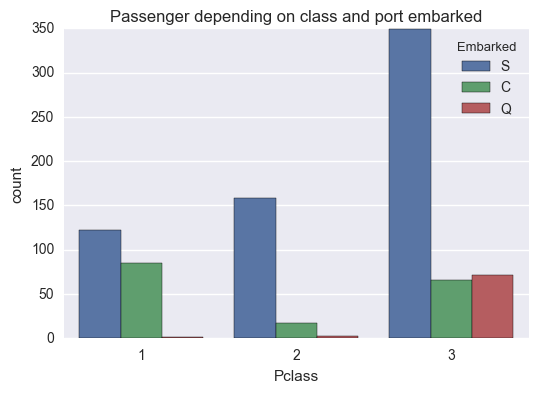

In [593]:
titanicAge_df = titanic_df.dropna() ## Delete ages and embarked missed

sns.boxplot(data = titanic_df, x = 'Embarked', y = 'Age') # We will appreciate better with boxplot
sns.plt.title('Passenger Age depending on Port Embarked')
sns.plt.show()


sns.countplot(data = titanic_df, x = 'Pclass', hue = 'Embarked')
sns.plt.title('Passenger depending on class and port embarked')
sns.plt.show()

Most of people in Queenstown seem to be 3rd Class, while in Cherbourg seems to embarked people from all the classe and Southampton mainly sencond and third.

## 3.6. Was the sex and important factor?

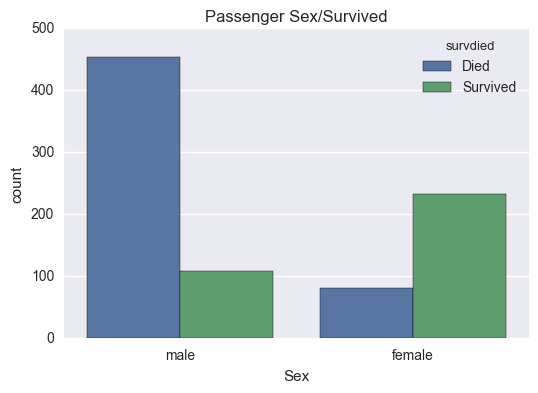

In [594]:
maleP = titanic_df[titanic_df.Sex == 'male']
femaleP = titanic_df[titanic_df.Sex == 'female']
malePS = maleP[maleP.Survived == True]
femalePS = femaleP[femaleP.Survived == True]

sexTable = {
    'Passengers': TableSeries(len(maleP), len(femaleP), 'Male', 'Female'),
    'Survived': TableSeries(len(malePS),len(femalePS), 'Male', 'Female'),
    '% Passeng.': TableSeries((100*float(len(maleP)) / (len(titanic_df))) , (100*float(len(femaleP)) / (len(titanic_df))), 'Male', 'Female'),
    '% Surv.': TableSeries((100*float(len(malePS)) / (len(maleP))) , (100*float(len(femalePS)) / (len(femaleP))), 'Male', 'Female'),
}
sns.countplot(data = titanic_df, x = 'Sex', hue = 'survdied')
sns.plt.title('Passenger Sex/Survived')
sns.plt.show()

Genre was an important factor in order to survive, as you can see there is a big difference between male and female survived.

In [595]:
pd.DataFrame(sexTable)

,% Passeng.,% Surv.,Passengers,Survived
Male,64.155251,19.217082,562,108
Female,35.844749,74.203822,314,233


Here we can see a big difference between women and men survived. Women were more likely to survive.

# 4. Communication

First of all, mention the limitations of the analysis:
   + We only analyze 891 out of 2224 passengers.
   + There are data missed (age, embarked...) that we solved deleting the passenger when we analyze this specific data. We decided to delete instead of calculate a general mean because we considered we already had enough data.
   


1. It was more likely to survived being with your family(50%) than being alone(31%)
2. Only 12% of old people survived agains the 58% of young people survived.
3. Indeed, there were a big difference among classes. 1st Class people were more likely to survive as 2nd or 3rd. There was a big difference between poeple survived and death in 3rd Class.
4. 33 out of 78. It looks a big number.
5. Mean age are similar on the three ports, however the class is slightly different. For example Queenstown it was a port of mainly 3rd class people while in Southamptonthere were not many 1st class passengers.
6. Women and children first. It seems that it was mainly women this time. 74% of women survived against 19% of men.

In light of the above, it was more likely to die if you belonged to 3rd Class and more likely to survive if you belonged to 1st Class. Being with your family was a good way to survive. Best age to survive was between 20 and 35 years old, specially if you were a woman.

